In [3]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [70]:
fundamentals = pd.read_csv('fundamentals.csv', index_col=0) #import data

In [71]:
fundamentals.isna() #check na values

,Ticker Symbol,Period Ending,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1776,False,False,False,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1777,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1778,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1779,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [72]:
fundamentals.dropna(axis=0,inplace=True) #drop rows that contain na value

In [73]:
fundamentals.drop(['Period Ending', 'Ticker Symbol'], axis=1, inplace=True)
# drope Period Ending and Ticker Symbol columns.

# Q1

In [74]:
plt.figure(figsize=(30, 20)) #set the canvas size

<Figure size 2160x1440 with 0 Axes>

<Figure size 2160x1440 with 0 Axes>

<Axes: xlabel='Total Liabilities & Equity', ylabel='Total Revenue'>

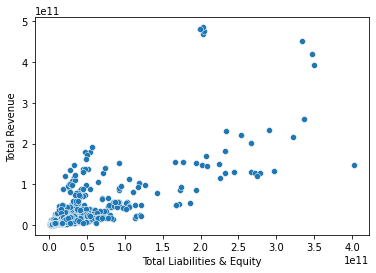

In [147]:
sns.scatterplot(x = 'Total Liabilities & Equity', y = 'Total Revenue', data = fundamentals) #create scatter plot

This diagram indicates the total revenue over Total Liabilities & Equity. And it shows a trend that the larger the Total Liability & Equity, the larger the Total Revenue.

<Axes: xlabel='Total Revenue', ylabel='Earnings Per Share'>

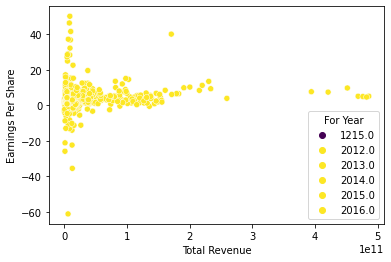

In [76]:
sns.scatterplot(x = 'Total Revenue', y = 'Earnings Per Share', data = fundamentals, hue = 'For Year', palette = 'viridis')

This diagram shows the Earning Per Share over Total revenue. But again, no correlation between these two variables found.

<ipython-input-150-5484cdc9c956>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fundamentals['Total Revenue'], color = 'blue')


<Axes: xlabel='Total Revenue', ylabel='Density'>

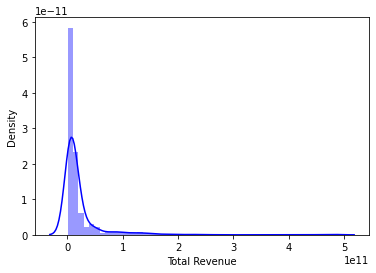

In [150]:
sns.distplot(fundamentals['Total Revenue'], color = 'blue') 
# check for the Total Revenue distribution

This diagram shows the distribution of Total Revenue, we can tell that most revenue are barely larger than 0 unit.

<ipython-input-78-0dcf8693ba3a>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(fundamentals['Earnings Per Share'], color = 'green')


([<matplotlib.axis.XTick at 0x7f972b1f4c10>,
 [Text(-10, 0, '−10'),
  Text(-9, 0, '−9'),
  Text(-8, 0, '−8'),
  Text(-7, 0, '−7'),
  Text(-6, 0, '−6'),
  Text(-5, 0, '−5'),
  Text(-4, 0, '−4'),
  Text(-3, 0, '−3'),
  Text(-2, 0, '−2'),
  Text(-1, 0, '−1'),
  Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15')])

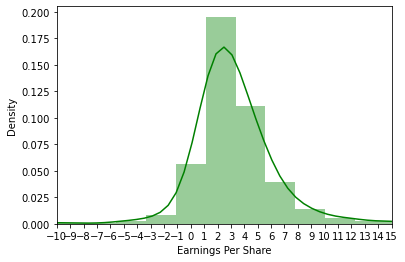

In [78]:
sns.distplot(fundamentals['Earnings Per Share'], color = 'green')
plt.xlim(-10,15) # set the x axis range
plt.xticks(range(-10, 16)) # make sure each number of unit is shown on x axis

This is a distribution diagram that indicats most Earing Per Share are located between 1-5, intensely concentrated between 1-3.

<Axes: >

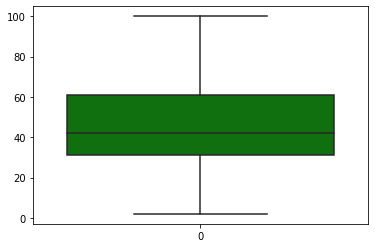

In [79]:
sns.boxplot(fundamentals['Gross Margin'], color = 'green') # Boxplot to show Gross Margin distribution

This boxplot has the central line located a bit lower than the middle of the chart, indicating that most companies have gross margin larger than the median amount overall.

# Q2

# Create Linear Regression Model

In [80]:
from sklearn.linear_model import LinearRegression
from sklearn import metrics
import statsmodels.api as sm

In [81]:
y = fundamentals['Estimated Shares Outstanding'] 
X = fundamentals.drop('Estimated Shares Outstanding', axis=1) #Select all variables but Estimated Shares Outstanding as independent variables

In [85]:
# Add intercept to X and fit the model
X = sm.add_constant(X)
lm = sm.OLS(y, X).fit()

In [86]:
print(lm.summary())

                                 OLS Regression Results                                 
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.854
Model:                                      OLS   Adj. R-squared:                  0.846
Method:                           Least Squares   F-statistic:                     98.40
Date:                          Wed, 17 Jan 2024   Prob (F-statistic):               0.00
Time:                                  20:47:39   Log-Likelihood:                -27507.
No. Observations:                          1299   AIC:                         5.516e+04
Df Residuals:                              1225   BIC:                         5.554e+04
Df Model:                                    73                                         
Covariance Type:                      nonrobust                                         
                                                          coef    std err          t      P>|t|      [0.025   

The model has been trained on 1299 observations, which is the sample size.
The R-squared shows that approximately 85.4% of the variation in 'Estimated Shares Outstanding' can be explained by the model's inputs.
The probability of the F-statistic, denoted here as '0.00', indicates the statistical significance of the regression model. A value close to 0 suggests that the model's predictors are collectively significant.

# Q3

Multicollinearity means the situation where two or more predictor variables are highly correlated with each other. Here are how it affects the interpretation of a linear regression model's coefficients.

Multicollinearity can inflate the variances of the coefficient estimates, which leads to wider confidence intervals and less reliable statistical tests. This means that a variable that is actually important might not appear to be statistically significant, potentially leading to the exclusion of relevant variables from the model.

Multicollinearity can also be a sign of overfitting, especially when many correlated predictors are trying to explain the same variance in the dependent variable. This overfitting can lead to poor model performance on new, unseen data.

The sign and magnitude of coefficients may change due to multicollinearity, which can be counterintuitive. For instance, a positive relationship in simple regression could turn negative in multiple regression if the independent variables are correlated in a certain way.

In this dataset, we might have the presence of Multicollinearity since we have some variables that are correlated. For example, Total Current Assets, Total Current Liabilities, Total Equity, Total Liabilities, Total Liabilities & Equity. As a conseqence, it led to high error of prediction, as shown in the Evaluation Metrics I created above.

# Q4

In [90]:
pvalues = lm.pvalues

In [91]:
print(pvalues)

const                         4.658595e-01
Accounts Payable              4.415806e-01
Accounts Receivable           2.029366e-01
Add'l income/expense items    5.253299e-01
After Tax ROE                 1.831375e-01
                                  ...     
Total Liabilities & Equity    4.663092e-01
Total Revenue                 4.663741e-01
Treasury Stock                4.199307e-01
For Year                      6.311003e-01
Earnings Per Share            7.831145e-27
Length: 76, dtype: float64


Text(0, 0.5, 'Frequency')

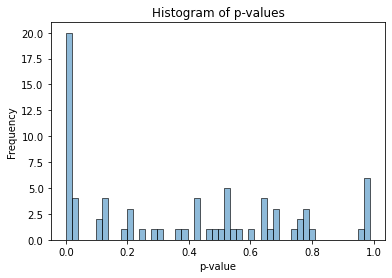

In [62]:
sns.histplot(pvalues, bins=50, edgecolor='black', alpha=0.5)
plt.title("Histogram of p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")

There is a high frequency of p-values close to 0, showing a slightly right-skewed pattern. This indicates that many of the statistical tests have resulted in significant outcomes, assuming the common alpha level of 0.05 is used for significance.We also can observe that the distribution of p-values is not uniform and has multiple peaks. 

# Q5

In [92]:
# define a function to find the true discoveries according to the p-values and q values input
def fdr(pvals, q, plotit=False):
  # Remove NA values
  pvals = np.array(pvals)
  pvals = pvals[~np.isnan(pvals)]
  N = len(pvals)
  
  # Sort the p-values and calculate the FDR threshold
  sorted_pvals = np.sort(pvals)
  k = np.arange(1, N+1)
  fdr_threshold = (q * k) / N
  
  # Find the last p-value that is below the FDR threshold
  below_threshold = sorted_pvals <= fdr_threshold
  max_index = np.max(np.where(below_threshold)) if np.any(below_threshold) else 0
  alpha = sorted_pvals[max_index]
  print(f"Alpha: {alpha}")
  true_discoveries = np.sum(sorted_pvals <= sorted_pvals[max_index])

  if plotit:
    plt.scatter(range(N), sorted_pvals, c=np.where(sorted_pvals <= alpha, 'red', 'grey'), marker='o')
    plt.yscale('log')
    plt.plot(range(N), fdr_threshold, linestyle='--', color='blue')
    plt.xlabel("Tests ordered by p-value")
    plt.ylabel("p-values")
    plt.title(f"FDR = {q}")
    plt.show()
  
  return true_discoveries

Alpha: 0.0016866310778572494


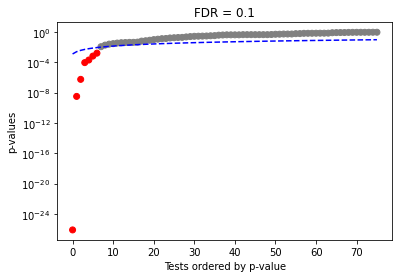

In [93]:
true_discoveries = fdr(pvalues, 0.1, plotit=True) # feed the p-values from lm to see the true discoveries

In [97]:
print("The amount of true discovery is:",true_discoveries)

The amount of true discovery is: 7


# Q6

Alpha: 0.0002091826768174316


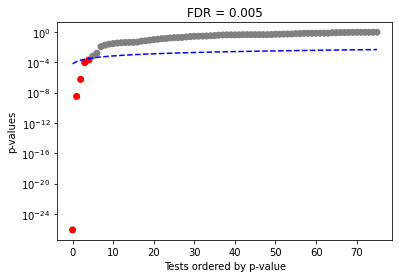

In [100]:
true_discoveries2 = fdr(pvalues, 0.005, plotit=True)

In [101]:
print("The amount of true discovery is:",true_discoveries2)

The amount of true discovery is: 5


Alpha: 5.861264056991867e-07


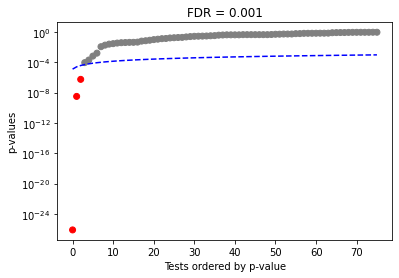

In [102]:
true_discoveries3 = fdr(pvalues, 0.001, plotit=True)

In [103]:
print("The amount of true discovery is:",true_discoveries3)

The amount of true discovery is: 3


Alpha: 0.0016866310778572494


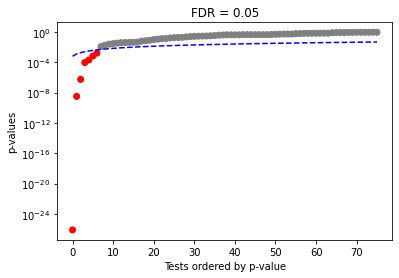

In [105]:
true_discoveries4 = fdr(pvalues, 0.05, plotit=True)

In [106]:
print("The amount of true discovery is:",true_discoveries4)

The amount of true discovery is: 7


Alpha: 0.012009465666148075


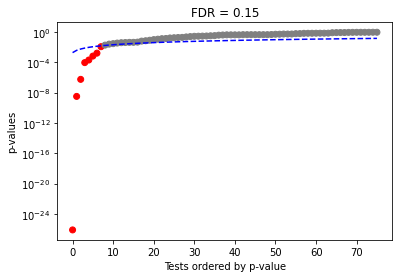

In [109]:
true_discoveries5 = fdr(pvalues, 0.15, plotit=True)

In [110]:
print("The amount of true discovery is:",true_discoveries5)

The amount of true discovery is: 8


From the different q values I input, we can see that, the smaller the q value, the less the amount of true discovery. In other words, the robustness increases as the q value decreases because it means we are less willing to tolerate the false discovery.

# Q7

## a)

In [118]:
from sklearn.preprocessing import PolynomialFeatures

In [113]:
fundamentals.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Total Current Assets,Total Current Liabilities,Total Equity,Total Liabilities,Total Liabilities & Equity,Total Revenue,Treasury Stock,For Year,Earnings Per Share,Estimated Shares Outstanding
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,7.072000e+09,9.011000e+09,-7.987000e+09,2.489100e+10,1.690400e+10,2.485500e+10,-367000000.0,2012.0,-5.60,3.350000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,1.432300e+10,1.380600e+10,-2.731000e+09,4.500900e+10,4.227800e+10,2.674300e+10,0.0,2013.0,-11.25,1.630222e+08
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,1.175000e+10,1.340400e+10,2.021000e+09,4.120400e+10,4.322500e+10,4.265000e+10,0.0,2014.0,4.02,7.169154e+08
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,9.985000e+09,1.360500e+10,5.635000e+09,4.278000e+10,4.841500e+10,4.099000e+10,0.0,2015.0,11.39,6.681299e+08
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,3.184200e+09,2.559638e+09,1.210694e+09,3.403120e+09,4.613814e+09,6.205003e+09,-27095000.0,2012.0,5.29,7.328355e+07


In [115]:
X2 = fundamentals.iloc[:,0:25] # Select the first 25 columns as required

In [117]:
X2.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Earnings Before Interest and Tax,Earnings Before Tax,Effect of Exchange Rate,Equity Earnings/Loss Unconsolidated Subsidiary,Fixed Assets,Goodwill,Gross Margin,Gross Profit,Income Tax,Intangible Assets
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,-1.813000e+09,-2.445000e+09,0.0,0.0,1.340200e+10,0.000000e+00,58.0,1.435600e+10,-5.690000e+08,8.690000e+08
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,-1.324000e+09,-2.180000e+09,0.0,0.0,1.925900e+10,4.086000e+09,59.0,1.572400e+10,-3.460000e+08,2.311000e+09
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,4.099000e+09,3.212000e+09,0.0,0.0,2.308400e+10,4.091000e+09,63.0,2.703000e+10,3.300000e+08,2.240000e+09
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5.496000e+09,4.616000e+09,0.0,0.0,2.751000e+10,4.091000e+09,73.0,2.989400e+10,-2.994000e+09,2.249000e+09
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,6.579150e+08,6.240740e+08,0.0,0.0,1.292547e+09,7.638900e+07,50.0,3.098036e+09,2.364040e+08,2.884500e+07


In [119]:
poly_features = PolynomialFeatures(degree=2, include_bias=False, interaction_only=False)

In [ ]:
X_poly = poly_features.fit_transform(X2)

In [123]:
X_poly_names = poly_features.get_feature_names_out(X2.columns)

In [126]:
X_poly_names.shape

(350,)

In [127]:
poly_df = pd.DataFrame(X_poly, columns = X_poly_names)

In [128]:
poly_df.head()

,Accounts Payable,Accounts Receivable,Add'l income/expense items,After Tax ROE,Capital Expenditures,Capital Surplus,Cash Ratio,Cash and Cash Equivalents,Changes in Inventories,Common Stocks,...,Gross Margin^2,Gross Margin Gross Profit,Gross Margin Income Tax,Gross Margin Intangible Assets,Gross Profit^2,Gross Profit Income Tax,Gross Profit Intangible Assets,Income Tax^2,Income Tax Intangible Assets,Intangible Assets^2
0,3.068000e+09,-222000000.0,-1.961000e+09,23.0,-1.888000e+09,4.695000e+09,53.0,1.330000e+09,0.0,127000000.0,...,3364.0,8.326480e+11,-3.300200e+10,5.040200e+10,2.060947e+20,-8.168564e+18,1.247536e+19,3.237610e+17,-4.944610e+17,7.551610e+17
1,4.975000e+09,-93000000.0,-2.723000e+09,67.0,-3.114000e+09,1.059200e+10,75.0,2.175000e+09,0.0,5000000.0,...,3481.0,9.277160e+11,-2.041400e+10,1.363490e+11,2.472442e+20,-5.440504e+18,3.633816e+19,1.197160e+17,-7.996060e+17,5.340721e+18
2,4.668000e+09,-160000000.0,-1.500000e+08,143.0,-5.311000e+09,1.513500e+10,60.0,1.768000e+09,0.0,7000000.0,...,3969.0,1.702890e+12,2.079000e+10,1.411200e+11,7.306209e+20,8.919900e+18,6.054720e+19,1.089000e+17,7.392000e+17,5.017600e+18
3,5.102000e+09,352000000.0,-7.080000e+08,135.0,-6.151000e+09,1.159100e+10,51.0,1.085000e+09,0.0,6000000.0,...,5329.0,2.182262e+12,-2.185620e+11,1.641770e+11,8.936512e+20,-8.950264e+19,6.723161e+19,8.964036e+18,-6.733506e+18,5.058001e+18
4,2.409453e+09,-89482000.0,6.000000e+05,32.0,-2.711820e+08,5.202150e+08,23.0,5.981110e+08,-260298000.0,7000.0,...,2500.0,1.549018e+11,1.182020e+10,1.442250e+09,9.597827e+18,7.323881e+17,8.936285e+16,5.588685e+16,6.819073e+15,8.320340e+14


In [130]:
X2_sm = sm.add_constant(poly_df).reset_index(drop=True)

In [132]:
y = y.reset_index(drop=True)

In [133]:
lm2 = sm.OLS(y,X2_sm).fit()

In [134]:
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     Estimated Shares Outstanding   R-squared:                       0.944
Model:                                      OLS   Adj. R-squared:                  0.926
Method:                           Least Squares   F-statistic:                     52.58
Date:                          Thu, 18 Jan 2024   Prob (F-statistic):               0.00
Time:                                  00:47:48   Log-Likelihood:                -26886.
No. Observations:                          1299   AIC:                         5.440e+04
Df Residuals:                               983   BIC:                         5.604e+04
Df Model:                                   315                                         
Covariance Type:                      nonrobust                                         
===================================================================================================================================================
                                                                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------------------------------------
const                                                                               0.0003      0.000      1.485      0.138    -9.8e-05       0.001
Accounts Payable                                                                   -0.0746      0.046     -1.626      0.104      -0.165       0.015
Accounts Receivable                                                                -0.5293      0.285     -1.858      0.063      -1.088       0.030
Add'l income/expense items                                                          0.0629      0.283      0.222      0.824      -0.492       0.618
After Tax ROE                                                                       0.0017      0.001      1.300      0.194      -0.001       0.004
Capital Expenditures                                                                0.0200      0.097      0.207      0.836      -0.170       0.210
Capital Surplus                                                                     0.0558      0.021      2.671      0.008       0.015       0.097
Cash Ratio                                                                       6.529e-05      0.000      0.293      0.770      -0.000       0.001
Cash and Cash Equivalents                                                          -0.0255      0.059     -0.428      0.668      -0.142       0.091
Changes in Inventories                                                             -0.1323      0.471     -0.281      0.779      -1.056       0.792
Common Stocks                                                                      -0.0115      0.050     -0.231      0.817      -0.109       0.086
Cost of Revenue                                                                    -0.0081      0.009     -0.885      0.376      -0.026       0.010
Current Ratio                                                                      -0.0006      0.000     -1.843      0.066      -0.001    3.72e-05
Deferred Asset Charges                                                              0.2455      0.121      2.024      0.043       0.007       0.483
Deferred Liability Charges                                                         -0.0354      0.059     -0.604      0.546      -0.151       0.080
Depreciation                                                                        0.0519      0.151      0.343      0.732      -0.245       0.349
Earnings Before Interest and Tax                                                    0.4237      0.307      1.381      0.168      -0.178       1.026
Earnings Befo

## b)

Interaction terms are able to show some data insights that individual variables are not able to. For example,Accounts Payable : Fixed Assets (p-value = 0) shows us how the relationship between the amount a company owes to its suppliers (Accounts Payable) and the value of its long-term assets (Fixed Assets) jointly affect the outcome (Estimated Shares Outstanding). In terms of the model accuracy, it greatly promots the R-squared to 0.944, meaning 94.4% of the dependent variable is explained by the model.

# Q8

## a)

In [135]:
print(f"Original model R-squared: {lm.rsquared}")
print(f"Revised model R-squared: {lm2.rsquared}")

Original model R-squared: 0.8543144092420101
Revised model R-squared: 0.9439749764758117


The r-square has been increased to 0.9439749764758117 from 0.8543144092420101, indicating a signficant promotion in the model performance. The old model explains about 85% of the dependent variable, right now 94% for the new model. 

# b)

As some variables became statistcally significant, some variables turned to statistically insignificant in the new linear regression model.For example, Accounts Receivable and Capital Surplus's p-values went below 0.05 in the new model, while it was above 0.05 in the first model.

By including interaction terms, it is allowing the model to attribute some of the variance that it could not previously explain to these new terms. This can lead to a redistribution of the explained variance among the predictors, which can increase or decrease the p-values of the original variables.

# Q9

## a)

In [138]:
pvalues2 = lm2.pvalues

Text(0, 0.5, 'Frequency')

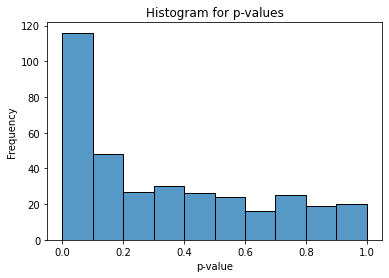

In [143]:
sns.histplot(pvalues2, edgecolor='black')
plt.title("Histogram for p-values")
plt.xlabel("p-value")
plt.ylabel("Frequency")

The p-values are still concentrated near 0, while no other obvious peaks, meaning the model has more variables that has p-value close to 0 that indicates a statistical significance.

## b)

Alpha: 0.018994461454281228


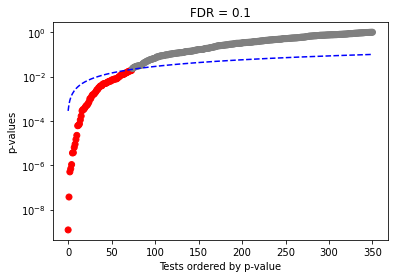

In [145]:
true_discoveries2 = fdr(pvalues2, 0.1, plotit=True)

In [146]:
print("The amount of true discovery is:",true_discoveries2)

The amount of true discovery is: 74


# c)

There is a significant increase in the tre discovery, meaning the new model has captured more significant variables that the previous model didn't. But the overfitting issue might occur in the new model.

The FDR is the expected proportion of false discoveries among all discoveries . As I increase the number of tests (by adding interaction terms), FDR becomes more challenging and uncertain due to the increased model complexity and increaed amount of true discovery. 